# Data Preparation and synthethize networks of different classes

In this chapter we are going to prepare the data for the next chapters. 
We will also create a synthetic network of each class.

Different Datasets:

- MS2265: Mass spectral database NIST
- N9: Exhausitve, non-isomorphic, connected graph with 9 vertices (Nauty)
- T15: Exhausitve, non-isomorphic, connected tree-graph with 15 vertices (Nauty)

## Create a set of graphs from "On structure-sensitivity of degree-based topological indices"

Let $G$ be a graph. Start be settings $\mathscr{S}(G) = \emptyset$. Delete from $G$ an edge and insert into it another edge. Do this in all possible ways.

Let $G'$ be a graph obtained by delete from $G$ an edge, and by inserting into it another edge. If $G'$ is not connected, then disregard it. If $G' \cong G$ (isomorphic) then disregard $G'$.
If $G'$ is connected, check wether it is isomorphic to any of the elements of $\mathscr{S}(G)$. If yes, disregard it. If not, include $G'$ into the set $\mathscr{S}(G)$.

Do the transformation $G \rightarrow G'$ in all possible ways.

In [ ]:
import networkx as nx

import matplotlib.pyplot as plt


In [ ]:
S = []
G = nx.path_graph(8)
S.append(G)

not_existing_edges = nx.non_edges(G)
edges_of_G = G.edges()

for u, v in not_existing_edges:
    for existing_u, existing_v in edges_of_G:
        G_new = G.copy()
        G_new.remove_edge(existing_u, existing_v)
        G_new.add_edge(u, v)
        if (nx.is_connected(G_new) == False):
            print("Not connected")
            continue
        if (nx.is_isomorphic(G, G_new) == False):
            S.append(G_new)
            not_existing_edges = nx.non_edges(G_new)
            edges_of_G = nx.edges(G_new)
            print("Found a new graph")

for G in S:
    nx.draw(G, with_labels=True)
    plt.show()


In [ ]:
k = 4
i = 0
G_full = nx.complete_graph(k)
G = nx.path_graph(k)
S = []

S.append(G)
missing_edges = nx.non_edges(G)
G_new = G.copy()

while nx.is_isomorphic(G_new, G_full) == False and i < k^2:
    i = 1
    for j in range(i):
        missing_edge = missing_edges
        G_new.add_edge(u, v)

    if any(nx.is_isomorphic(G_new, g_in_s) for g_in_s in S) == False:
        G_new = G_new.copy()
        S.append(G_new)
        print(f"added {u}, {v}")
    else:
        G_new.remove_edge(u, v)
        print(
            f"not added {u}, {v} as it is isomorphic to another graph in S")
    i += 1

for G in S:
    nx.draw(G, with_labels=True)
    plt.show()


[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (7, 8)]
[(0, 1), (0, 2), (0, 8), (2, 7), (3, 6), (3, 14), (4, 13), (5, 12), (5, 14), (6, 9), (7, 10), (7, 11), (7, 13), (8, 14)]


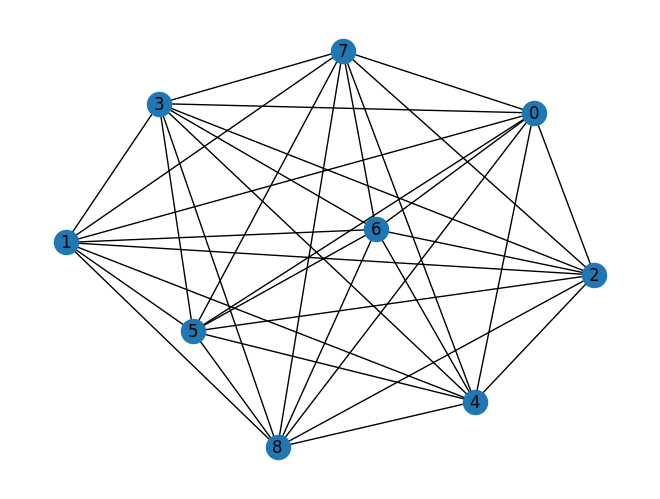

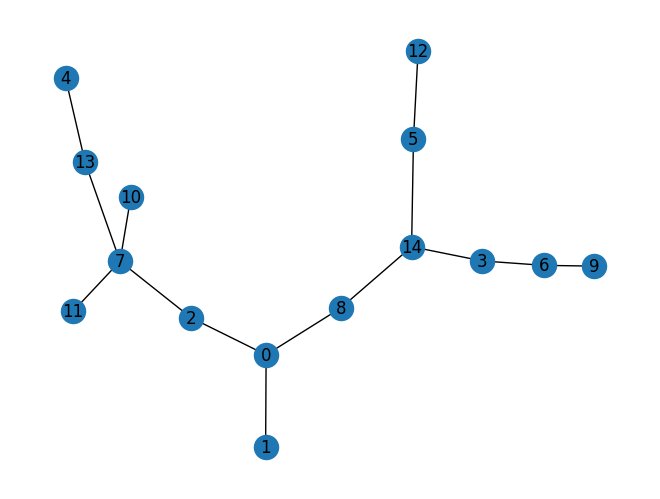

In [5]:
import networkx as nx

# Create the N9 graph
n9 = nx.complete_graph(9)

# Create the T15 graph
t15 = nx.random_tree(15)

# Print the edges of each graph
print(n9.edges())
print(t15.edges())

# plot the graphs
nx.draw(n9, with_labels=True)
plt.show()

nx.draw(t15, with_labels=True)
plt.show()

added [(0, 2), (0, 8), (1, 5), (1, 8), (1, 7), (3, 5), (4, 6), (4, 8), (7, 9)]
added [(0, 1), (0, 7), (0, 3), (1, 6), (2, 8), (2, 9), (3, 4), (3, 8), (5, 9)]
added [(0, 1), (0, 4), (2, 4), (3, 4), (3, 7), (3, 8), (3, 5), (5, 9), (6, 9)]
added [(0, 1), (1, 5), (1, 7), (1, 4), (2, 4), (3, 4), (4, 9), (5, 6), (7, 8)]
added [(0, 4), (1, 5), (1, 4), (2, 6), (3, 4), (4, 8), (6, 8), (7, 9), (8, 9)]
added [(0, 6), (0, 4), (1, 2), (1, 3), (2, 7), (3, 6), (4, 8), (4, 5), (5, 9)]
added [(0, 3), (1, 4), (1, 7), (2, 4), (3, 4), (5, 7), (5, 8), (5, 9), (6, 8)]
added [(0, 5), (0, 7), (0, 8), (1, 4), (2, 6), (3, 4), (3, 8), (6, 8), (8, 9)]
added [(0, 2), (0, 6), (0, 9), (1, 2), (3, 7), (3, 5), (4, 6), (5, 8), (5, 9)]
added [(0, 1), (0, 4), (0, 9), (2, 3), (2, 6), (2, 7), (2, 5), (4, 5), (5, 8)]


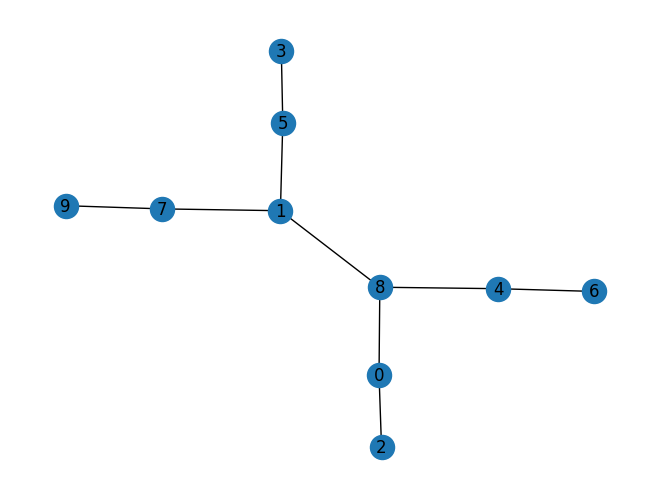

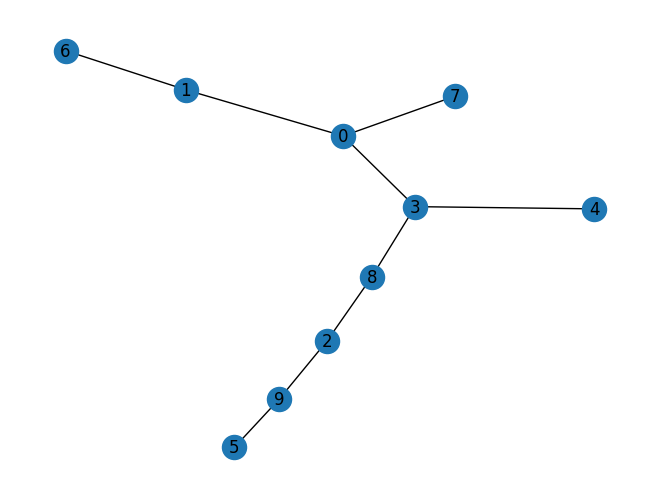

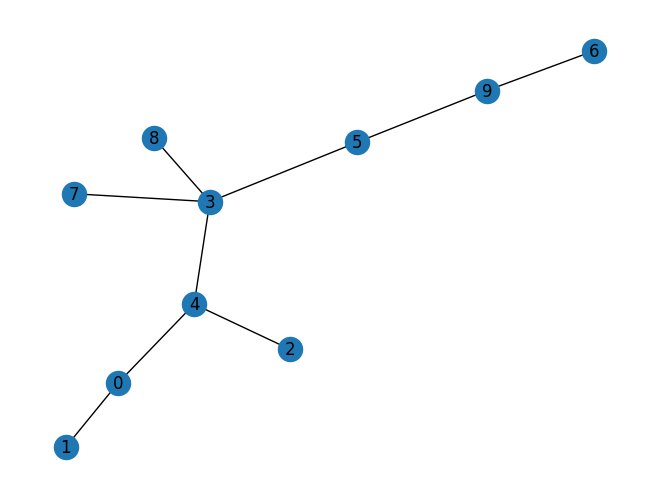

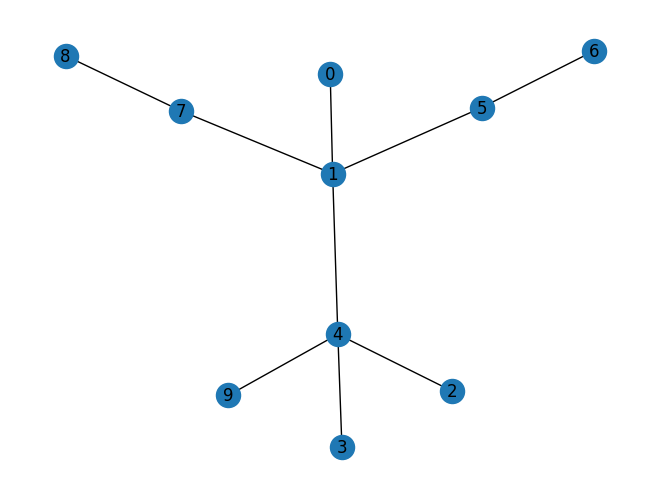

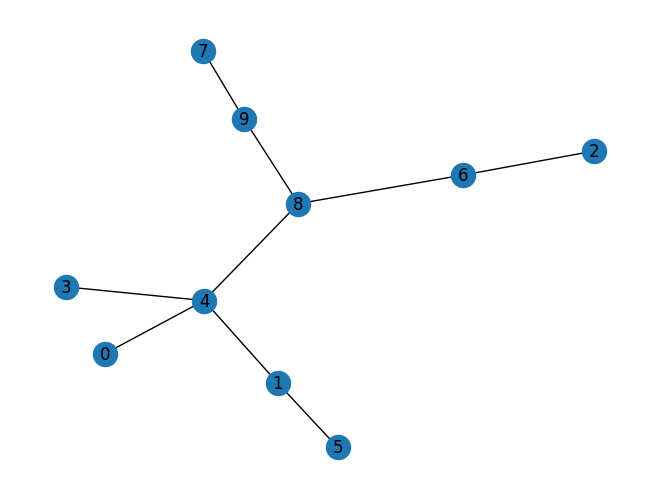

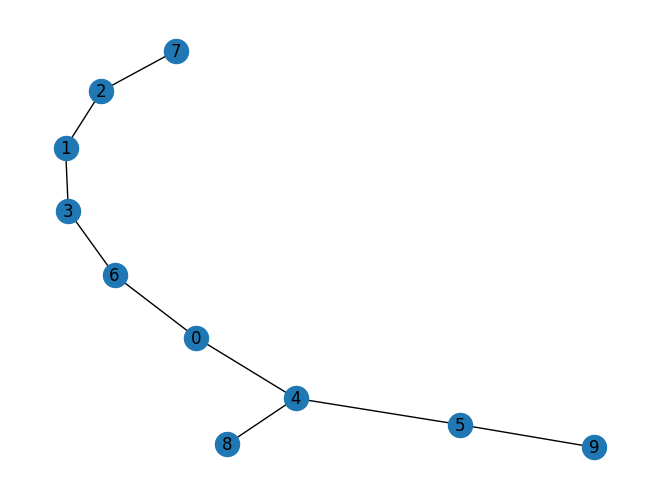

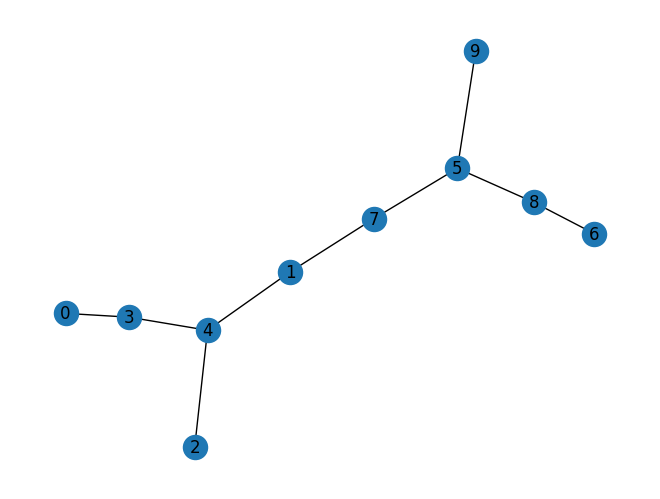

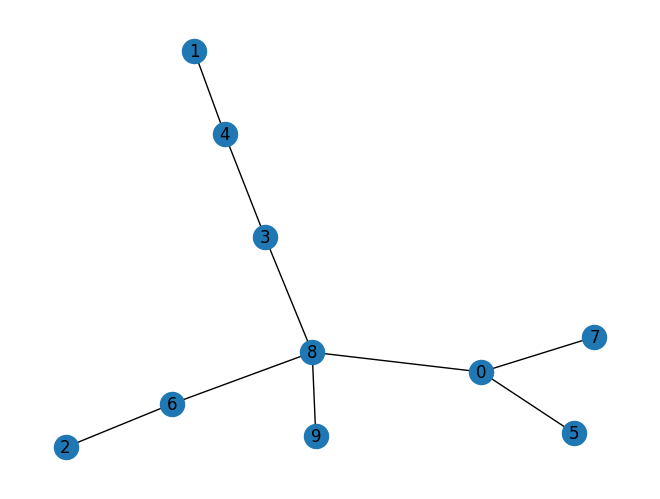

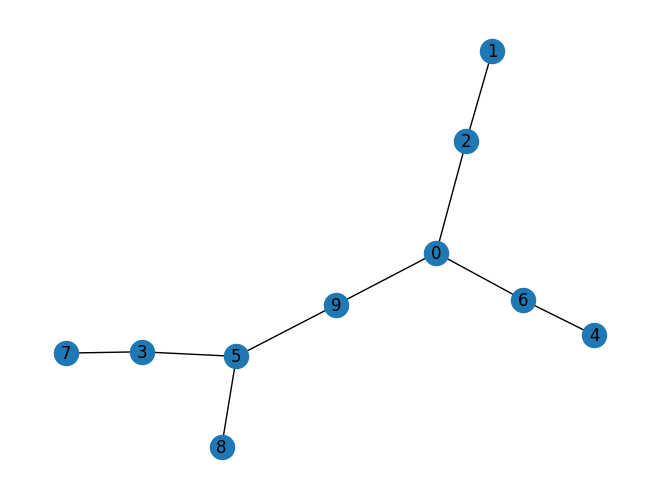

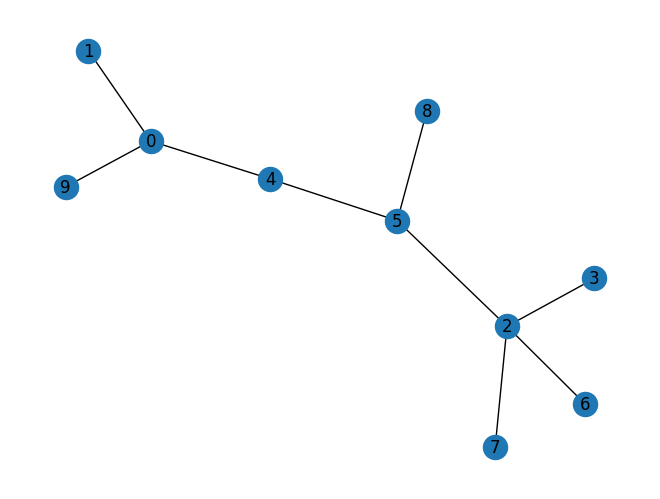

In [6]:
non_isomorphic_treegraphs = []
while len(non_isomorphic_treegraphs) < 10:
    g = nx.random_tree(10)

    if any(nx.is_isomorphic(g, g_in_s) for g_in_s in non_isomorphic_treegraphs) == False:
        non_isomorphic_treegraphs.append(g)
        print(f"added {g.edges()}")
    else:
        print(f"not added {g.edges()} as it is isomorphic to another graph in non_isomorphic_treegraphs")

for g in non_isomorphic_treegraphs:
    nx.draw(g, with_labels=True)
    plt.show()

In [7]:
for g in non_isomorphic_treegraphs:
    print(nx.wiener_index(g))
    print(nx.average_shortest_path_length(g))
    print(nx.average_clustering(g))

125.0
2.7777777777777777
0.0
137.0
3.0444444444444443
0.0
122.0
2.7111111111111112
0.0
110.0
2.4444444444444446
0.0
118.0
2.6222222222222222
0.0
153.0
3.4
0.0
141.0
3.1333333333333333
0.0
119.0
2.6444444444444444
0.0
133.0
2.9555555555555557
0.0
123.0
2.7333333333333334
0.0
